In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Para ajustar datos

In [8]:
path = "Seguimiento_interseccion_1-2-2022_1.dat"
data = np.loadtxt(path)
# Separando columas de datos
x, y = data[:,0], data[:,1]

path = "Seguimiento_interseccion_1-2-2022_2.dat"
data_ = np.loadtxt(path)
x_,y_ = data_[:,0], data[:,1]

# x, x_ esta en nm y representa el desplazamiento 
# y, y_ esta en nm y representa la longitud de onda

In [9]:
# Realizando ajuste 

# Vamos a eliminar las dos primeras entradas debido a perturbaciones del sistema

# Definicion del modelo a ajustar
def f(x,a,b):
    y = a*x+b 
    return y

# Estimaciones iniciales de los parametros del modelo
p0 = [-5,1600]
# Ajustando
pars, cov = curve_fit(f=f, xdata=x[:], ydata=y[:],p0=p0, bounds=(-np.inf,np.inf))
# Separando parametros
a,b = pars[:]

# Definiendo dominio de la funcion ajustada
x_fit = np.arange(100,900,0.01) 
# Evaluando funcion ajustada
y_fit = f(x_fit,a,b)


# Ajustando la nueva curva
pars,cov = curve_fit(f=f, xdata=x_, ydata=y_,p0=p0, bounds=(-np.inf,np.inf))
a_,b_ = pars[:]
x_fit_ = np.arange(300,1100,0.01)
y_fit_ = f(x_fit_, a_, b_)

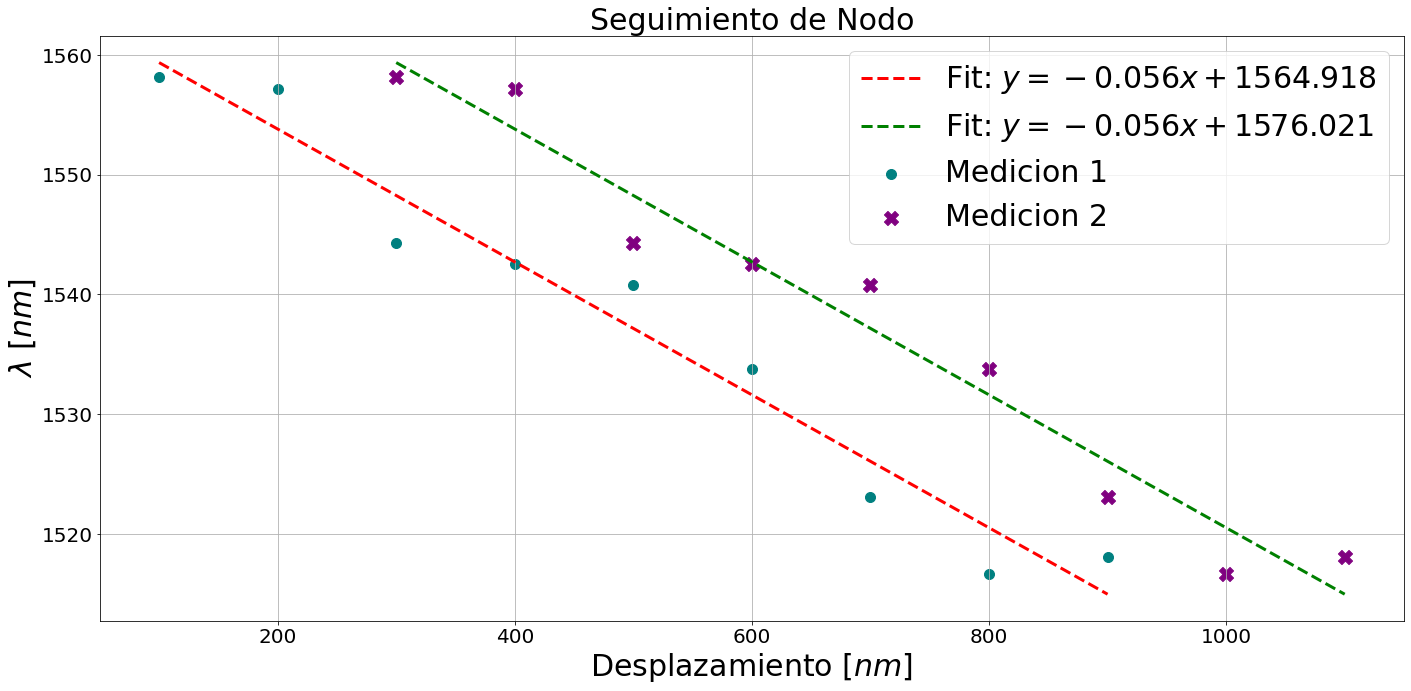

In [15]:
 
"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig,ax = plt.subplots(figsize=(20,10))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 20})

# Graficando el espectro optico inicial
ax = plt.subplot(1,1,1)
graph_data = ax.scatter(x,y, s=400,marker="." , c="teal" ,label= "Medicion 1")
graph_data_ = ax.scatter(x_,y_, s=200, marker="X", c="purple", label = "Medicion 2")
graph_fit = ax.plot(x_fit, y_fit, c="red", linestyle="dashed", 
linewidth=3, label=r"Fit: $y = %.3f x + %.3f$"%(a,b))
graph_fit_ = ax.plot(x_fit_, y_fit_, c="green", linestyle="dashed", 
linewidth=3, label=r"Fit: $y = %.3f x + %.3f$"%(a_,b_))

ax.set_xlabel(xlabel=r"Desplazamiento $[nm]$", fontsize=30)
ax.set_ylabel(ylabel=r"$\lambda$ $[nm]$", fontsize=30)
ax.set_title(label="Seguimiento de Nodo", fontsize=30)
#ax.set_xticks(np.arange(0.1,len(x)+0.1,0.1))
ax.grid()
#ax.set_ylim([-40,-10])
ax.legend(loc="best",fontsize=30)
#plt.savefig("algo.png")
plt.show()

# Para separar datos de mediciones por columas 

Cada medicion esta separada por columnas, la primera columa es el dominio en $\lambda$ y las columnas restantes son mediciones de la potencia en dBm del interrogador

Se realizara la separacion en archivos para poder ajustar este formato a los codigos ya existentes

In [63]:
path = "/home/alejandro_goper/Descargas/espectros_alejandro_ref.dat"
data = np.loadtxt(path)
lambda_ = data[:,0]


In [64]:
prefijo = "/home/alejandro_goper/Descargas/Espectro ("
# Ponemos los arreglos en formator especifico para añadir columna
# Vease: https://www.delftstack.com/es/howto/numpy/numpy-add-column/#:~:text=append()-,La%20funci%C3%B3n%20numpy.,valores%20a%20el%20array%20preexistente.
lambda_ = lambda_.reshape((len(lambda_),1))
# Para cada columna generaremos un archivo
for i in range(1,len(data[1]),1):
    nombre = prefijo + str(i) + ").dat"
    data_r = data[:,int(i)]
    # Esta es la columna a agregar y debemos formatearla igual
    data_r = data_r.reshape((len(data_r),1))
    # Agregamos columna en un solo array
    array = np.append(lambda_,data_r, axis=1)
    # Guardamos con formator float de 3 decimales de precision 
    np.savetxt(nombre,array,fmt="%.3f")